# Model comparison: Naive Bayes vs DistilBERT
### Imports

In [1]:
import os
import json
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Defining folders

In [2]:
ROOT_DIR = os.path.abspath("..")

NB_META = os.path.join(ROOT_DIR, "models", "naive_bayes", "nb_metadata.json")
BERT_META = os.path.join(ROOT_DIR, "models", "distilbert", "bert_metadata.json")

PLOTS_DIR = os.path.join(ROOT_DIR, "outputs", "plots")
RESULTS_DIR = os.path.join(ROOT_DIR, "results")

os.makedirs(RESULTS_DIR, exist_ok=True)

print("NB_META:", NB_META)
print("BERT_META:", BERT_META)
print("RESULTS_DIR:", RESULTS_DIR)

NB_META: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/naive_bayes/nb_metadata.json
BERT_META: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/models/distilbert/bert_metadata.json
RESULTS_DIR: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/results


### Loading metadata

In [4]:
with open(NB_META, "r") as f:
    nb_meta = json.load(f)

with open(BERT_META, "r") as f:
    bert_meta = json.load(f)

print("Loaded NB keys:", list(nb_meta.keys()))
print("Loaded BERT keys:", list(bert_meta.keys()))

Loaded NB keys: ['model', 'best_alpha', 'alphas_tested', 'tfidf', 'label_names', 'label_to_id', 'seed', 'sizes', 'metrics_test', 'top_spam_terms', 'top_spam_scores']
Loaded BERT keys: ['model', 'max_length', 'seed', 'epochs', 'learning_rate', 'batch_size_train', 'batch_size_eval', 'weight_decay', 'warmup_ratio', 'label_to_id', 'id_to_label', 'sizes', 'metrics_test', 'device', 'best_checkpoint_dir']


### Comparison Table

In [5]:
def _get_metrics(meta: dict) -> dict:
    m = meta.get("metrics_test", {})
    return {
        "accuracy": float(m.get("accuracy", np.nan)),
        "precision": float(m.get("precision", np.nan)),
        "recall": float(m.get("recall", np.nan)),
        "f1": float(m.get("f1", np.nan)),
        "roc_auc": float(m.get("roc_auc", np.nan)),
        "ap": float(m.get("ap", np.nan)),
    }

nb_metrics = _get_metrics(nb_meta)
bert_metrics = _get_metrics(bert_meta)

comparison_df = pd.DataFrame([
    {"Model": "Multinomial Naive Bayes", **nb_metrics},
    {"Model": "DistilBERT (Fine-tuned)", **bert_metrics},
])

comparison_df

,Model,accuracy,precision,recall,f1,roc_auc,ap
0,Multinomial Naive Bayes,0.988395,0.983607,0.923077,0.952381,0.992716,0.979777
1,DistilBERT (Fine-tuned),0.992263,0.984127,0.953846,0.968750,0.999660,0.997720


### Saving table to results directory

In [6]:
out_csv = os.path.join(RESULTS_DIR, "model_comparison_metrics.csv")
comparison_df.to_csv(out_csv, index=False)
print("Saved:", out_csv)

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/results/model_comparison_metrics.csv


### Model metrics in percentages

In [7]:
pct_df = comparison_df.copy()
for col in ["accuracy", "precision", "recall", "f1", "roc_auc", "ap"]:
    pct_df[col] = (pct_df[col] * 100).round(2)

pct_df

,Model,accuracy,precision,recall,f1,roc_auc,ap
0,Multinomial Naive Bayes,98.84,98.36,92.31,95.24,99.27,97.98
1,DistilBERT (Fine-tuned),99.23,98.41,95.38,96.88,99.97,99.77


### Bar chart comparison (Core metrics)

<Figure size 1000x500 with 0 Axes>

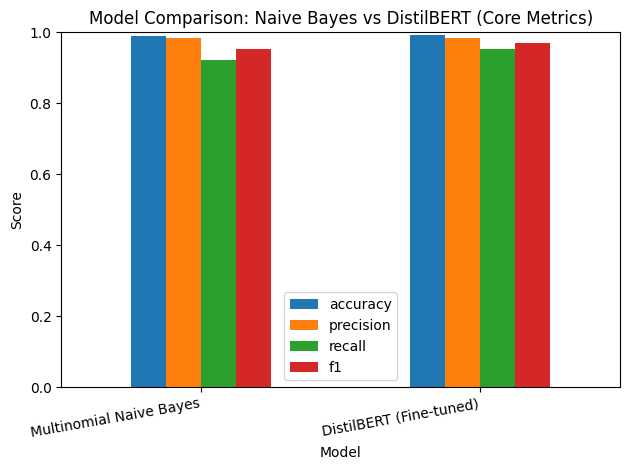

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/results/compare_core_metrics.png


In [8]:
metrics_to_plot = ["accuracy", "precision", "recall", "f1"]
plot_df = comparison_df.set_index("Model")[metrics_to_plot].copy()

plt.figure(figsize=(10, 5))
plot_df.plot(kind="bar")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Comparison: Naive Bayes vs DistilBERT (Core Metrics)")
plt.xticks(rotation=10, ha="right")
plt.tight_layout()

out_path = os.path.join(RESULTS_DIR, "compare_core_metrics.png")
plt.savefig(out_path, bbox_inches="tight")
plt.show()

print("Saved:", out_path)

### ROC-AUC and Average Precision comparison

<Figure size 800x500 with 0 Axes>

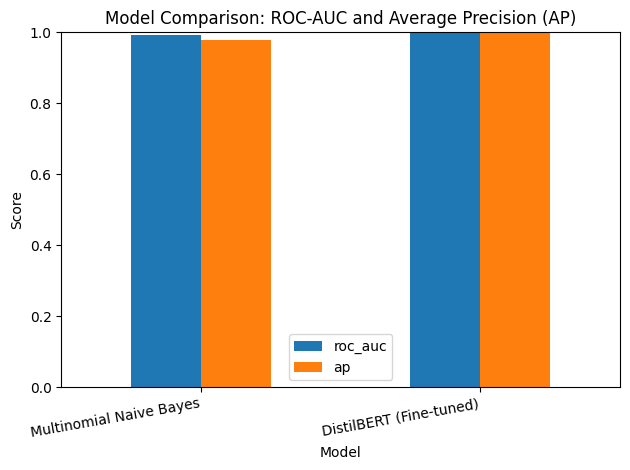

Saved: /Users/amatyaumanga/Downloads/Applied-Machine-Learning-Coursework/results/compare_auc_ap.png


In [9]:
metrics_to_plot = ["roc_auc", "ap"]
plot_df = comparison_df.set_index("Model")[metrics_to_plot].copy()

plt.figure(figsize=(8, 5))
plot_df.plot(kind="bar")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Comparison: ROC-AUC and Average Precision (AP)")
plt.xticks(rotation=10, ha="right")
plt.tight_layout()

out_path = os.path.join(RESULTS_DIR, "compare_auc_ap.png")
plt.savefig(out_path, bbox_inches="tight")
plt.show()

print("Saved:", out_path)